<font size = 22> <center> 05 - Model and Evaluation </center> </font>

<img src="https://miro.medium.com/max/1400/1*jcXeBFzKpV-GZ0auYf1n0A.png">

# Getting Started

<font size=4> Google Colab Configuration

In [18]:
#👀clone the repository to have access to all the data and files
repository_name = "Machine_Learning Pipeline_-_Complete Overview"
repository_url = 'https://github.com/TKovaks78/' + repository_name

In [ ]:
! git clone $repository_url

In [ ]:
#Install Requirements
! pip install -Uqqr $repository_name/requirements.txt

⚠️ Restart the kernel after running these cells for the first time

<font size=4> Essential

In [2]:
# Importing required libraries for the project
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library
import os

# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Increase pandas display limit of columns to 500 
pd.options.display.max_columns = 500 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

<font size=4> Get the data

*We will use 4 data sets:*

In [3]:
import os
import tarfile
import urllib.request

#👀Define path from where you download the data

PATH1 = os.path.join("datasets", "housing")
DATA1 = "housing.csv"

#Function to load the data
def load_data(path, data):
    csv_path = os.path.join(path, data)
    return pd.read_csv(csv_path)

- Data Frame Name: `df_rg`: 
- Dataset Name: housing data set
- Prediction Type: Regression
- Predictors Type: numerical + 1 categorical

In [4]:
#Load df_rg

#Call the function
data1 = load_data(PATH1, DATA1)

#create a copy
df_rg = data1.copy()

#Read the data
df_rg.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Put everything together with pipeline

2 important notions while building a pipeline:
- Transformers for which you use `fit_transform`
- Predictors for which you use `fit_predict`

In [9]:
#Prepare variables for preprocessing
df_rg = data1.copy()
X = df_rg.drop("median_house_value", axis=1)
y = df_rg['median_house_value']

#Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN


## Column Transformer Pipeline

Preprocessing Pipeline:
- Impute total_bedrooms
- StandardScaler for latitude and longitude
- MinMaxScaler for other numeric variables (except target
- OHE ocean_proximity

### With class

⚠️ <u>Note:</u> class are useful **only if** you are planning to repeat the process multiple time

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin #TransformerMixin means that if we define fit and transform it will automatically do fit_transform
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.base import RegressorMixin
from sklearn.linear_model import LinearRegression

class impute_total_bedrooms(BaseEstimator,TransformerMixin):
    def fit(self, X_train, y=None): #self is used to access variables that belong to a class
        return self
    def transform(self, X_train):
        imputer = SimpleImputer(strategy="mean")
        X_train["total_bedrooms"]=imputer.fit_transform(X_train[["total_bedrooms"]]) #double bracket = .values if only one variable
        return X_train

class OHE (BaseEstimator,TransformerMixin):
    def __init__(self, **kwargs):
        self.feature_names = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

    def fit(self, X_train, y=None):
        return self

    def transform(self, X_train):
        OHE = pd.get_dummies(X_train["ocean_proximity"])
        X_train = X_train.join(OHE)
        return X_train.drop(columns = "ocean_proximity")

class features_scaler (BaseEstimator,TransformerMixin):
    def fit(self, X_train, y=None): #self is used to access variables that belong to a class
        return self
    def transform(self, X_train):
        #MinMax Scaler
        min_scaler = MinMaxScaler()
        X_train[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]= min_scaler.fit_transform(X_train[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]].values)
        
        #Standard Scaler
        sd_scaler = StandardScaler()
        X_train[["longitude","latitude"]] = sd_scaler.fit_transform(X_train[["longitude","latitude"]].values)
        return X_train

Now let's put everything in a pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

column_transformer = Pipeline([
    ("imputer", impute_total_bedrooms()), 
    ("OHE", OHE()),
    ("scaler", features_scaler())
    ])

X_train_transformed = column_transformer.fit_transform(X_train)
X_train_transformed.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,1.272587,-1.372811,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0,0,0,0,1
8267,0.709162,-0.876696,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0,0,0,0,1
17445,-0.447603,-0.460146,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0,0,0,0,1
14265,1.232698,-1.382172,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0,0,0,0,1
2271,-0.108551,0.532084,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0,1,0,0,0


<u>Note:</u> instead of using the `Pipeline` module you can use `make_pipeline`. The only difference is that you can't and won't have to name any estimator (e.g example below)

In [12]:
from sklearn.pipeline import make_pipeline

make_column_transformer = make_pipeline(impute_total_bedrooms(), OHE(), features_scaler())
    
X_train_transformed = pipe.fit_transform(X_train)
X_train_transformed.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,1.272587,-1.372811,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0,0,0,0,1
8267,0.709162,-0.876696,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0,0,0,0,1
17445,-0.447603,-0.460146,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0,0,0,0,1
14265,1.232698,-1.382172,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0,0,0,0,1
2271,-0.108551,0.532084,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0,1,0,0,0


### With column transformer

`ColumnTransformer` is used to combine transformer pipeline

In [22]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [23]:
numerical_features = X_train.iloc[:,:-1]
categorical_features = X_train.iloc[:,-1]

In [24]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [25]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

<u>Note:</u> As far as I know, you will also need to use the ColumnTransformer if you want to combine estimators and transformers in the same pipeline

In [51]:
full_processor = ColumnTransformer(transformers=[
    ('transformer', column_transformer)
    ])

## Add Estimator Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

#define lasso model
lasso = Lasso(alpha=0.1)

#Put everything into a pipeline 
pipe = Pipeline(steps=[
    ('preprocess', column_transformer), 
    ('model', lasso)
    ])

#Train your model on the train dataset
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', impute_total_bedrooms()),
                                 ('OHE', OHE()),
                                 ('scaler', features_scaler())])),
                ('model', Lasso(alpha=0.1))])

In [56]:
#Test model on the test dataset

#Predict values of the test dataset
y_pred = pipe.predict(X_test)

#Get the MAE score by comparing predicted values y_pred with actual target y_test
print('MAE score:', mean_absolute_error(y_test, y_pred))

MAE score: 69822.53980957619


<u>Note:</u> `.score` return:
- The *accuracy* when called on classifiers
- The *R squared* when called on a regressors

In [57]:
print('R squared:', pipe.score(X_test, y_test))

R squared: 0.27342289819786514


# GridSearch

**Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

<center><b>GridSearch vs RandomGridSearch:</b></center>


- Grid search:
    - looks at every possible combination of hyperparameters to find the best model
    - sklearn.model_selection.GridSearchCV
- Randomized Grid Search:
    - only selects and tests a random combination of hyperparameters.
    - sklearn.model_selection.RandomizedSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

#define parameters, np.arrange(0, 1, 0.05) means every values from 0 to 0.1 with intervals of 0.05
param_dict = {'model__alpha': np.arange(0, 1, 0.05)}

#GridSearch
search = GridSearchCV(pipe, 
                      param_dict,
                      n_jobs=5, #Number of jobs to run in parallel (depending on your computer)
                      cv=5, #number of cross validation fold
                      scoring='neg_mean_absolute_error')

#Fit the model
search.fit(X_train, y_train)

#Get the best parameters for your model
print('Best parameters:', search.best_params_)

#Find best model score
print('Best Model Score:',search.score(X_train, y_train))

Best parameters: {'model__alpha': 0.0}
Best Model Score: -49594.84209472437


Now we can fine-tune the model. We see that the best score is at alpha=0.
Let's check the values from alpha=0 to alpha = 0.05.

In [59]:
#define parameters, np.arrange(0, 1, 0.05) means every values from 0 to 0.1 with intervals of 0.05
param_dict2 = {'model__alpha': np.arange(0, 0.05, 0.01)}

#GridSearch
search2 = GridSearchCV(pipe, 
                      param_dict2,
                      n_jobs=5, #Number of jobs to run in parallel (depending on your computer)
                      cv=5, #number of cross validation fold
                      scoring='neg_mean_absolute_error')

#Fit the model
search2.fit(X_train, y_train)

#Get the best parameters for your model
print('Best parameters:', search2.best_params_)

#Find best model score
print('Best Model Score:',search2.score(X_train, y_train))

Best parameters: {'model__alpha': 0.0}
Best Model Score: -49594.84209472437


# Hyperparameters Optimization with Parfit

**Source:** https://blog.mlreview.com/parfit-hyper-parameter-optimization-77253e7e175e </br>
**Documentation:** https://github.com/jmcarpenter2/parfit </br>
**What is the full process?**
- Create an effective validation set
- Choose your model(s)
- Create a parameter grid over which to evaluate your model on the validation set
- Use parfit to visualize the scores over the grid and select the best model
- Re-train model on full training set, using best parameters from parfit
- Apply re-trained model to test set



⚠️ Parfit use a lot of computing power. Use it on google colab and save your work before running it

In [7]:
#Prepare variables for preprocessing
df_rg = data1.copy()
X = df_rg.drop(["median_house_value","ocean_proximity"], axis=1)
y = df_rg['median_house_value']

#Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125


In [8]:
import parfit as pf
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
paramGrid = ParameterGrid({
    'min_samples_leaf': [1,3,5,10,15,25,50,100,125,150,175,200],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [60],
    'n_jobs': [-1],
    'random_state': [42]
})
best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, paramGrid, 
     X_train, y_train, X_test, y_test, 
     metric=roc_auc_score, scoreLabel='AUC')
print(best_model)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  

MemoryError: could not allocate 963379200 bytes

# Models Review

<u>Note:</u> This part will be in-between theory and practice </br>
For each model we will review:
- Very brief recap on statistical concepts
- When to use it
- Model's assumptions (normal distribution, numerical variables only etc.)
- Parameters for the Grid Search ([here](#https://topepo.github.io/caret/available-models.html) a comprehensive summary of hyperparameter tuning for each model)
- Practical Application


⚠️ For the rest of the notebook we will generate dataset with numpy or sklearn

**Reminder:**
- <u>Regression:</u> predict a continuous value (ex: predicted ROI is 1802 USD) 
- <u>Classification:</u> predict a class 
    - Binary: breast cancer YES/NO
    - Multiclass: Cover Type: 1, 2, 3, 4
    - Multilabel: each instance can be assigned to multiple class (ex: Alber is in the man category but also in the artist category etc.)

However, you will see that some regression models are used for classification and vice versa. We are just using the mathematical classification here

## Regression Models

### Vanilla (standard) Linear Regression

**Theory**

$\hat{y} = θ_0 + θ_1x_1 + θ_2x_2 + ⋯ + θ_nx_n$ </br>
- ŷ is the predicted value.
- n is the number of features.
- $x_i$ is the $i^{th}$ feature value.
• $θ_j$ is the $j^{th}$ model parameter (including the bias term $θ_0$ and the feature weights $θ_1, θ_2, ⋯, θ_n$).

In [5]:
#Generate the dataset
X = 2 * np.random.rand(50, 1)
y = 2 + 3 * X + np.random.randn(50, 1)

**When to use it?**

- regression problem, if you see that scatter plots could more or less fit in a straight line

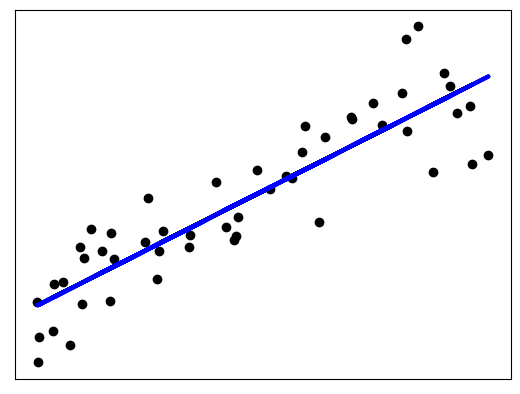

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = LinearRegression()

# Train the model
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# Plot outputs
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Assumptions**
- Linear relationship
- Multivariate normality
- No or little multicollinearity
- No auto-correlation
- Homoscedasticity (same variance)

**Parameters**</br>
*None*

### Gradient Descent

❗ Can also be used for classification problems with [SDG Classifier](#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

**Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

**Theory**

**To go further:** https://towardsdatascience.com/everything-you-need-to-know-about-gradient-descent-b1d9edfce0b5 </br>
Gradient descent is an optimization algorithm that tweaks parameters $\theta$ iteratively at a certain learning rat in order to minimize the cost function. </br> 
Below, you can see visually how it works (w = $\theta$)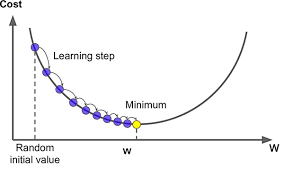 </br>
If you take the vanilla linear regression equation, $\hat{y} = θ_0 + θ_1x_1 + θ_2x_2 + ⋯ + θ_nx_n$,  gradient descent will tweak the parameters $θ_0, θ_1, θ_2, ⋯ , θ_nx_n$ to minimize the cost function (the margin error of your prediction)  <img src='https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2016/11/gd_python.png' width=300></br>
On sklearn you will find the SDGRegressor (Sochastic Gradient Descent) which is a more computationally  efficient (faster and more scalable) way to perform gradient descent 


**When to use it?** </br>
- Only with data that poses a [convex-optimization problem](#http://www.cs.ubc.ca/labs/lci/mlrg/slides/non_convex_optimization.pdf) <img src="https://miro.medium.com/max/1100/1*5q6hqLS11phsiIqgnif-BQ.webp" width=350>
- well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend Ridge, Lasso, or ElasticNet

**Assumption:** convex optimization problem

**Important Parameters:** 
- `alpha`: 10.0 ** -np.arange(1, 7), (for tunning)
- `loss`: 'squared_loss', 'huber', 'epsilon_insensitive'
- `penalty`: 'l2', 'l1', 'elasticnet'
- `learning_rate`: 'constant', 'optimal', 'invscaling'
}

**Application**

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Generate the dataset 
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Define Model
model = SGDRegressor()

#Parameters for grid search
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7), #10^-7, 10-6,..., 10^-1
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(model, param_grid)
clf.fit(X, y)
print("Best score: " + str(clf.best_score_))

Best score: -1.7992407590262545


### Polynomial Regression

**Theory** </br>
<img src="https://slideplayer.com/slide/13398262/80/images/3/Polynomial+Function+in+General+Form.jpg" width = 350>

**When to use it?** </br>
Guess looking at the scatter plot <img src="https://www.researchgate.net/publication/336436894/figure/fig2/AS:961776833282052@1606316874910/Polynomial-functions-of-degrees-starting-from-0-through-5.ppm" width = 350>

**Assumptions**: same as linear regression

**Parameters** `degree`

**Application** 

In [12]:
lin_reg.coef_[:,1]

array([0.50291059])

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Generat dataset
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

#Transform features into polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Perform linear regression on the new features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("y-intercept is", lin_reg.intercept_)
print("coeff for x^2", lin_reg.coef_[:,1])
print("coeff for x", lin_reg.coef_[:,0])

y-intercept is [2.23841873]
coeff for x^2 [0.43334892]
coeff for x [0.96792485]


You can plot the learning curve to see whether you need more data to improve your algorithm

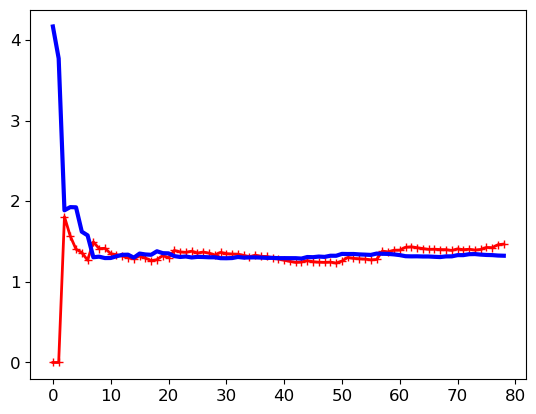

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Regularized Linear Models

Regularization in a nutshell:
- reduce bias/underfitting 
- increase variance/overfitting

We will review 3 models:
- Ridge
- Lasso
- Elastic Net

Linear regression, ridge, lasso or elastic net?
- Almost always preferable to have at least a bit of regularization so you should avoid plain linear regression
- Ridge is a good default
- Lasso/Elastic net(mix of Lasso and Ridge): if you suspect that only few features are actually useful 

**Important Parameter:** 
`solver` = 'svd', 'cholesky', 'lsqr', 'sag'
`'alpha` = 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100
`fit_intercept` = True, False
`'normalize` = True, False

In [7]:
# random search linear regression model on the auto insurance dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -29.015671926507366
Best Hyperparameters: {'alpha': 1.1183369286692078, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


#### Ridge Regression

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.00078736]])

#### Lasso

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.95774524])

#### Elastic Net

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.95955089])

###

### Logistic Regression

**Documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Theory** </br>
*vectorized form* $\hat{p}=h_{\theta}(x) = \sigma (\theta^T*x)$ </br>
*Equation* $\sigma(t)=\frac{1}{1+exp(-t)}$ </br>
<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png"> </br>
- if $\sigma(t)<0.5$ then the prediction is 0
- if $\sigma(t)>=0.5$ then the prediction is 1

**When to use it?** </br>
- Binary classification problem (does not perform well in multiclassification problems)
- Fast (perfect for a baseline)

**Assumptions** </br>
- independence of errors
- linearity in the logit for continuous variables
- absence of multicollinearity
- lack of strongly influential outliers

<font color=green>Pros:
- <font color=green>Convenient probability scores
- <font color=green>Efficient implementations available
- <font color=green>Widespread industry comfort for logistic regression solutions </font>
<font color=red>Cons:
- <font color=red>Doesn’t perform well when feature space is too large
- <font color=red>Doesn’t handle large number of categorical features/variables well
- <font color=red>Relies on transformations for non linear features </font>

**Hyperparameters Tunning**
- `penalty`: to add a regularization
    - `none`: no penalty is added;
    - `l2`: add a L2 penalty term and it is the default choice;
    - `l1`: add a L1 penalty term;
    - `elasticnet`: both L1 and L2 penalty terms are added.
- `solver`: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
- `C`: 1.0, 0.1, 0.01 
    - close to 1 -> light pernalty
    - close to 0 -> strong penalty

In [6]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.965333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958000 (0.017776) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958667 (0.018209) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958333 (0.019847) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.958667 (0.017269) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958667 (0.018927) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958667 (0.019788) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.959333 (0.017499) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.959333 (0.017499) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.959667 (0.018883) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.960000 (0.017321) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.960000 (0.017321) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.961333 (0.017269) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.965333 (0.015861) wi

### Softmax or Multinomial Logistic Regression

**Theory:** </br>
$\hat{P}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{ \sum_{j=1}^{K} exp(s_j(x))}$</br>
In a nutshell, the model compute the logistic regression score for each class and choose the class with the highest score

**When to use it?** </br>
- Multiclassification problems
- Fast (perfect for a baseline)

**Hyperparameters Tunning**
- `penalty`: to add a regularization
    - `none`: no penalty is added;
    - `l2`: add a L2 penalty term and it is the default choice;
    - `l1`: add a L1 penalty term;
    - `elasticnet`: both L1 and L2 penalty terms are added.
- `solver`: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
- `C`: 1.0, 0.1, 0.01 
    - close to 1 -> light pernalty
    - close to 0 -> strong penalty

>0.0000 0.777 (0.037)
>0.0001 0.683 (0.049)
>0.0010 0.762 (0.044)
>0.0100 0.775 (0.040)
>0.1000 0.774 (0.038)
>1.0000 0.777 (0.037)


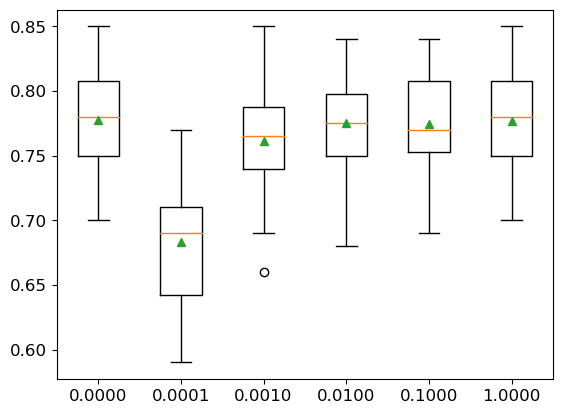

In [8]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Support Vector Machines (SVM)

**Documentation:** https://scikit-learn.org/stable/modules/svm.html

**Theory**</br>
SVM is versatile, we will show visually how SVM works:
- linear classification 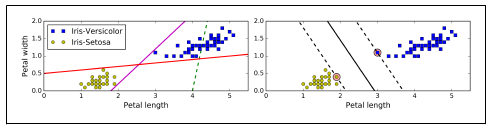
- non-linear classification 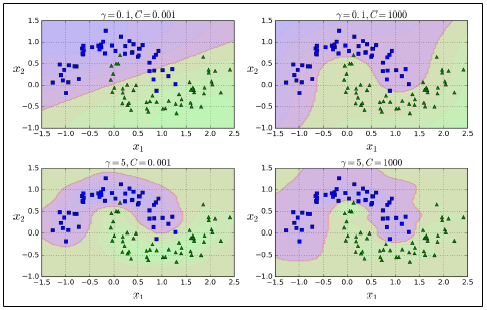
- linear regression 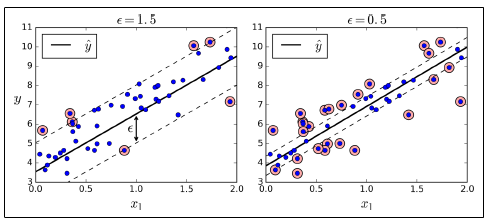
- non-linear 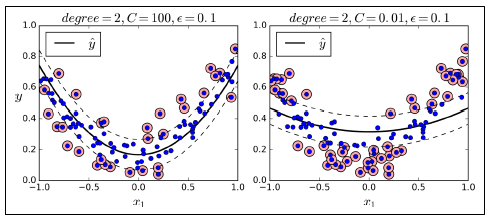
- outlier detection

<font color="green">Pros:
- <font color="green">Can handle large feature space
- <font color="green">Can handle non linear feature interactions

    
<font color="red">Cons:
- <font color="red">Cons:Not very efficient with large number of observations
- <font color="red">Cons:It can be tricky to find appropriate kernel sometimes

**Requirements**
- Scale the data

**Hyperparameters Tuning**
- kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
- C: 100, 10, 1.0, 0.1, 0.001

**Application**

In [9]:
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988333 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.988000 (0.010456) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.986000 (0.012543) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.967000 (0.013940) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.988000 (0.010456) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.986000 (0.012543) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.974667 (0.016479) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.988333 (0.009339) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.988000 (0.011075) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.984000 (0.013064) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.981667 (0.013437) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.988333 (0.010672) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.987000 (0.011590) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.981667 (0.013437) with: {'C': 0.01, 'gamma': 'scale'

## Tree Based Methods

**Documentation:** https://scikit-learn.org/stable/modules/ensemble.html

#### Theory

**Decision tree regressor** </br>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/48/DecisionCalcs.jpg"> </br>
**Decision tree classifier** </br>
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png"> </br>

**Random Forests:** 
- multiple decision trees trained on different subset of predictors in the dataset
- the result is the most frequent prediction
- increase bias/underfitting but decrease variance/overfitting

**Extra Trees:** 
- *"When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting (as discussed earlier). It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do)"* Geron Aurelien
- faster and more computotionally efficient than Random Forest, might or might not be less accurate 

<font color="green">Pros:
- <font color="green">Intuitive Decision Rules
- <font color="green">Can handle non linear features
    - <font color="green"> Consider variable interactions 
    
    
<font color="red">Cons:
- <font color="red">Highly biased to training set for decision tree (Random Forests solve this issue)
- <font color="red">No ranking score as direct result

**Assumptions:** very flexible model!
- No formal distributional assumptions
- non-parametric and can thus handle 
    - skewed data
    - multi-modal data 
    - categorical data 
    - ordinal or non-ordinal data

#### Application

**Hyperparameters Tuning**:
- `max_feature`: 
    - number of features at each split point
    - You can either:
        - try a range of integer values, such as 1 to 20, or 1 to half the number of input features
        - try a suite of different default value calculators.
- `n_estimators`
    - number of trees
    - 10, 100, 1000

In [10]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971667 using {'max_features': 'log2', 'n_estimators': 1000}
0.874667 (0.029747) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.956667 (0.018318) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.961000 (0.013988) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.845000 (0.039560) with: {'max_features': 'log2', 'n_estimators': 10}
0.965000 (0.017464) with: {'max_features': 'log2', 'n_estimators': 100}
0.971667 (0.013187) with: {'max_features': 'log2', 'n_estimators': 1000}


## Ensemble Methods

#### Theroy

**Voting Classifiers:** </br>
<img src="https://i.stack.imgur.com/W7UmY.png"> </br>
**Bagging and Pasting:** same training algorithm but on different random subset of the training set (ex: Random Forest)
- Bagging: sampling is performed with replacement 
- Sampling: is performed without replacement </br>

**Boosting** train predictor sequentially, each trying to correct its predecessor </br>
<img src="https://www.researchgate.net/publication/334404567/figure/fig4/AS:862185249071106@1582572390782/Illustrations-of-A-bagging-and-B-boosting-ensemble-algorithms.ppm"> </br>

**Stacking:** average of prediction instead of majority </br>
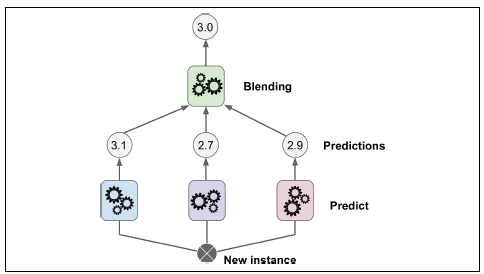


#### Boosters Application

In this part we will use a library called `hyperopt` for Bayesian optimization algorithm

**Comprehensive Example with XgBoost**

**Assumption:** encoded integer values for each input variable have an ordinal relationship

**Documentation:** https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters</br>
https://catboost.ai/en/docs/concepts/python-reference_train</br>
**Source:** https://towardsdatascience.com/an-example-of-hyperparameter-optimization-on-xgboost-lightgbm-and-catboost-using-hyperopt-12bc41a271e

**Hyperparameters Tuning:** </br>
- `eta`
    - learning rate (remember gradient boosting)
    - range : [0,1]
    - Typical final values : 0.01-0.2
- `max_depth`: 
    - used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample
    - Range: [0,∞]
    - Typical final values : 3-10
- `gamma`: 
    - minimum loss reduction required to make a split
    - Range: [0,∞]
    - The larger gamma is, the more conservative the algorithm will be
- `reg_alpha` : L2 regularization term on weights
- `reg_lambda` : L1 regularization term on weights
- `colsample_bytree`:  the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed
- `min_child_weight` : 
    - defines the minimum sum of weights of all observations required in a child. Used to control overfitting, however too high values lead to undefitting
    - range: [0,∞]
- `n_estimators`: number of trees
- `seed`: random number seed

We will use the `HYPEROPT` library for hyperparmeters tuning

*Prepare the data*

In [13]:
# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#👀Define path from where you download the data

PATH2 = os.path.join("datasets", "Wholesales")
DATA2 = "Wholesale customers data.csv"

#Call the function
data2 = load_data(PATH2, DATA2)

#create a copy
df = data2.copy()

#Feature and target variable
X = df.drop('Channel', axis=1)
y = df['Channel']

#Convert labels into binary values
y[y == 2] = 0
y[y == 1] = 1

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

*Hyperparameters Tuning*

In [14]:
# 1. Initialize domain space (input values over which we want to search)
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

# 2. Define objective function (evaluation metric and model)
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

#3 Optimization algorith
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.8560606060606061                                     
SCORE:                                                 
0.6515151515151515                                                                
SCORE:                                                                            
0.3484848484848485                                                                
SCORE:                                                                            
0.3484848484848485                                                                
SCORE:                                                                            
0.8712121212121212                                                                
SCORE:                                                                            
0.3484848484848485                                                                
SCORE:                                                                            
0.

In [15]:
#Print results
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8031412140014309, 'gamma': 2.7238882739702612, 'max_depth': 6.0, 'min_child_weight': 8.0, 'reg_alpha': 70.0, 'reg_lambda': 0.011841907823474496}


**Other Boosters**

1. Define parameter spaces

In [16]:
from hyperopt import hp
import numpy as np
from sklearn.metrics import mean_squared_error


# XGB parameters
xgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     100,
}
xgb_fit_params = {
    'eval_metric': 'rmse',
    'early_stopping_rounds': 10,
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))


# LightGBM parameters
lgb_reg_params = {
    'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05)),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 16, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
    'subsample':        hp.uniform('subsample', 0.8, 1),
    'n_estimators':     100,
}
lgb_fit_params = {
    'eval_metric': 'l2',
    'early_stopping_rounds': 10,
    'verbose': False
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))


# CatBoost parameters
ctb_reg_params = {
    'learning_rate':     hp.choice('learning_rate',     np.arange(0.05, 0.31, 0.05)),
    'max_depth':         hp.choice('max_depth',         np.arange(5, 16, 1, dtype=int)),
    'colsample_bylevel': hp.choice('colsample_bylevel', np.arange(0.3, 0.8, 0.1)),
    'n_estimators':      100,
    'eval_metric':       'RMSE',
}
ctb_fit_params = {
    'early_stopping_rounds': 10,
    'verbose': False
}
ctb_para = dict()
ctb_para['reg_params'] = ctb_reg_params
ctb_para['fit_params'] = ctb_fit_params
ctb_para['loss_func' ] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))


2. create a class HPOpt that is instantiated with training and testing data and provides the training functions.

In [20]:
import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = xgb.XGBRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}